###### k medoids :

###### به طور رسمی، K Medoids یک الگوریتم خوشه بندی است که پارتیشن مجموعه ای از نقاط داده در اطراف یک medoid (کمترین نقطه بی شباهت) و به طور مداوم تلاش برای کاهش بی شباهتی در میان نقاط در همان خوشه.

###### kmeans : 

######  یکی از ساده ترین و محبوب ترین الگوریتم های خوشه بندی در علم داده است. داده ها را بر اساس نزدیکی آن به یکی از K به اصطلاح centroids تقسیم می کند - نقاط داده ای که میانگین تمام مشاهدات در خوشه هستند. مشاهده یک رکورد واحد از داده ها از یک فرمت خاص است.

In [1]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('Absenteeism_at_work_Project.xlsx')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [3]:
from sklearn.impute import KNNImputer
for i,val in enumerate(df.isnull().sum()):
    if val != 0:
        name=df.columns[i]
        imp=KNNImputer()
        df[name]=imp.fit_transform(df[[name]])

In [4]:
df['Absenteeism time in hours']=df['Absenteeism time in hours'].apply(lambda x: 0 if x<24 else 1)

In [5]:
x=df.drop('Absenteeism time in hours',axis=1)
y=np.array(df['Absenteeism time in hours']).flatten()

In [6]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestClassifier
xtrain,xvalid,ytrain,yvalid=train_test_split(x,y,random_state=44)

In [7]:
inerth=[]
for i in range(1,15):
    model=KMeans(n_clusters=i)
    model.fit(xtrain)
    inerth.append(model.inertia_)

D:\file\anacoda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


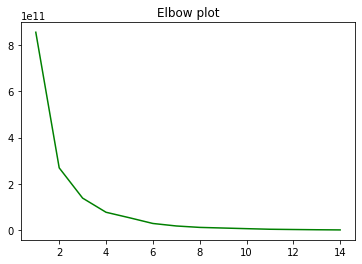

In [8]:
plt.title('Elbow plot')
plt.gca()
plt.plot(range(1,15),inerth,c='g')

In [9]:
from sklearn.metrics import adjusted_rand_score ,classification_report

In [10]:
model=KMeans(n_clusters=4)
model.fit(xtrain)
adjusted_rand_score(yvalid,model.predict(xvalid))

0.012304665655812126

In [11]:
model2=KMedoids(n_clusters=4)
model2.fit(xtrain)
adjusted_rand_score(yvalid,model2.predict(xvalid))

0.005219577569346943

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca=PCA(n_components=2)
x=pca.fit_transform(x)

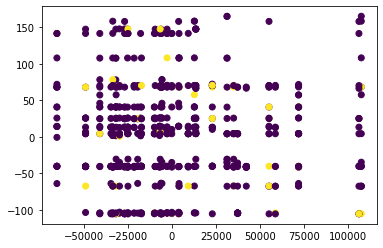

In [22]:
plt.scatter(x[:,0],x[:,1],c=y)

In [15]:
xtrain,xvalid,ytrain,yvalid=train_test_split(x,y,random_state=44)

In [16]:
rnf=RandomForestClassifier()
rnf.fit(xtrain,ytrain)
ypreRnf=rnf.predict(xvalid)

In [17]:
print(classification_report(yvalid,ypreRnf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       177
           1       0.00      0.00      0.00         8

    accuracy                           0.94       185
   macro avg       0.48      0.49      0.48       185
weighted avg       0.91      0.94      0.93       185



In [18]:
model=KMeans(n_clusters=2)
model.fit(xtrain)
adjusted_rand_score(yvalid,model.predict(xvalid))

0.055150332132819294

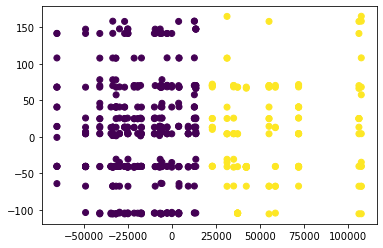

In [19]:
plt.scatter(xtrain[:,0],xtrain[:,1],c=model.labels_)

In [20]:
# یا در مواقیع که در دیتاست لیبل ها در اختیار یم باشند، روش های Clustering کاربردی دارند؟
# توضیح دهید

In [21]:
# kheyr monaseb nist zira unsupervised models baraye time ii hastand ke label na mojud ast va khodash label tolid mikonad